In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
import re

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
tvshow_dataset = pd.read_csv('/content/drive/MyDrive/data/imdb.csv',encoding='latin1')

our dataset was encoded in latin1

In [70]:
tvshow_dataset.head()

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,20082013,62 eps,18,9.5,(2.2M),TV Series
1,2. Planet Earth II,2016,6 eps,PG,9.5,(159K),TV Mini Series
2,3. Planet Earth,2006,11 eps,PG,9.4,(221K),TV Mini Series
3,4. Band of Brothers,2001,10 eps,15,9.4,(533K),TV Mini Series
4,5. Chernobyl,2019,5 eps,15,9.3,(876K),TV Mini Series


In [71]:
tvshow_dataset.tail()

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
245,246. Your Lie in April,20142015,24 eps,12,8.5,(39K),TV Series
246,247. Community,20092015,110 eps,12,8.5,(295K),TV Series
247,248. Tear Along the Dotted Line,2021,6 eps,15,8.6,(15K),TV Mini Series
248,249. Chef's Table,20152019,30 eps,15,8.5,(17K),TV Series
249,250. Sapne Vs Everyone,2023,5 eps,Mature,9.4,(67K),TV Series


In [72]:
tvshow_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titile          250 non-null    object 
 1   Year            250 non-null    object 
 2   Total_episodes  250 non-null    object 
 3   Age             244 non-null    object 
 4   Rating          250 non-null    float64
 5   Vote_count      250 non-null    object 
 6   Category        250 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.8+ KB


Now we will perform EDA

In [73]:
# Checking the null or Nan values
tvshow_dataset.isnull().sum()

Titile            0
Year              0
Total_episodes    0
Age               6
Rating            0
Vote_count        0
Category          0
dtype: int64

6 age data are missing.

In [74]:
# Fill missing values in 'Age' column with the mode
tvshow_dataset['Age'].fillna(tvshow_dataset['Age'].mode()[0], inplace=True)

In [75]:
tvshow_dataset.isnull().sum()

Titile            0
Year              0
Total_episodes    0
Age               0
Rating            0
Vote_count        0
Category          0
dtype: int64

In [76]:
# Summery of the Dataset
tvshow_dataset.describe()

,Rating
count,250.000000
mean,8.761600
std,0.228592
min,8.500000
25%,8.600000
50%,8.700000
75%,8.900000
max,9.500000


In [77]:
#it will remove extra information from Total_episodes like < >eps.
tvshow_dataset['Total_episodes'] = tvshow_dataset['Total_episodes'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]))

In [78]:
tvshow_dataset.head()

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,20082013,62,18,9.5,(2.2M),TV Series
1,2. Planet Earth II,2016,6,PG,9.5,(159K),TV Mini Series
2,3. Planet Earth,2006,11,PG,9.4,(221K),TV Mini Series
3,4. Band of Brothers,2001,10,15,9.4,(533K),TV Mini Series
4,5. Chernobyl,2019,5,15,9.3,(876K),TV Mini Series


In [79]:
# it will remove extra information in year column
tvshow_dataset['Year'] = tvshow_dataset['Year'].apply(lambda x: re.findall(r'\d{4}', str(x))[0] if re.findall(r'\d{4}', str(x)) else x)

In [80]:
tvshow_dataset.head()

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,2008,62,18,9.5,(2.2M),TV Series
1,2. Planet Earth II,2016,6,PG,9.5,(159K),TV Mini Series
2,3. Planet Earth,2006,11,PG,9.4,(221K),TV Mini Series
3,4. Band of Brothers,2001,10,15,9.4,(533K),TV Mini Series
4,5. Chernobyl,2019,5,15,9.3,(876K),TV Mini Series


In [81]:
# function to make vote_count integer
def convert_vote_count(vote):
    if 'M' in vote:
        return int(float(vote.replace('M', '').replace('(', '').replace(')', '')) * 1e6)
    elif 'K' in vote:
        return int(float(vote.replace('K', '').replace('(', '').replace(')', '')) * 1e3)
    else:
        return int(vote.replace('(', '').replace(')', ''))

In [82]:
tvshow_dataset['Vote_count'] = tvshow_dataset['Vote_count'].apply(convert_vote_count)

In [83]:
tvshow_dataset.head()

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,2008,62,18,9.5,2200000,TV Series
1,2. Planet Earth II,2016,6,PG,9.5,159000,TV Mini Series
2,3. Planet Earth,2006,11,PG,9.4,221000,TV Mini Series
3,4. Band of Brothers,2001,10,15,9.4,533000,TV Mini Series
4,5. Chernobyl,2019,5,15,9.3,876000,TV Mini Series


In [84]:
# Encode categorical variables
label_encoders = {}
for column in ['Titile', 'Age', 'Category']:
    label_encoders[column] = LabelEncoder()
    tvshow_dataset[column] = label_encoders[column].fit_transform(tvshow_dataset[column])

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
Titile,1.000000,0.019619,-0.049847,-0.072811,0.202915,-0.026301,-0.072480
Year,0.019619,1.000000,-0.221562,-0.280070,0.008659,0.091850,-0.038362
Total_episodes,-0.049847,-0.221562,1.000000,0.214418,-0.009213,0.060885,0.239323
Age,-0.072811,-0.280070,0.214418,1.000000,0.204984,-0.111420,-0.065467
Rating,0.202915,0.008659,-0.009213,0.204984,1.000000,0.246636,-0.236657
Vote_count,-0.026301,0.091850,0.060885,-0.111420,0.246636,1.000000,0.098116
Category,-0.072480,-0.038362,0.239323,-0.065467,-0.236657,0.098116,1.000000


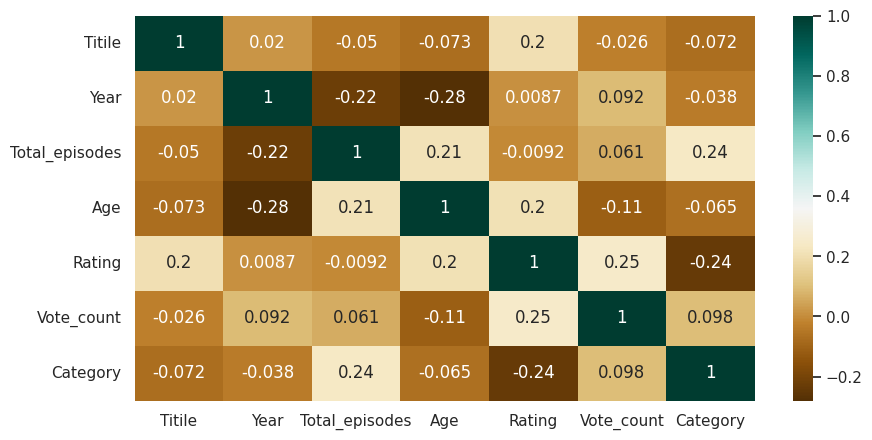

In [85]:
plt.figure(figsize=(10,5))
c= tvshow_dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [86]:
# Define features and target variable
x = tvshow_dataset.drop('Category', axis=1)
y = tvshow_dataset['Category']

now we will train our model

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)* 100}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

Accuracy: 96.0
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.98      0.98      0.98        44

    accuracy                           0.96        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.96      0.96      0.96        50


